In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sqlalchemy import create_engine, text

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

insurance_df = pd.read_sql_query(text('SELECT * FROM weatherinszeged'), con=engine.connect())

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)



,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [2]:
insurance_df.isnull().sum()*100/insurance_df.isnull().count()

date                  0.000
summary               0.000
preciptype            0.000
temperature           0.000
apparenttemperature   0.000
humidity              0.000
windspeed             0.000
windbearing           0.000
visibility            0.000
loudcover             0.000
pressure              0.000
dailysummary          0.000
dtype: float64

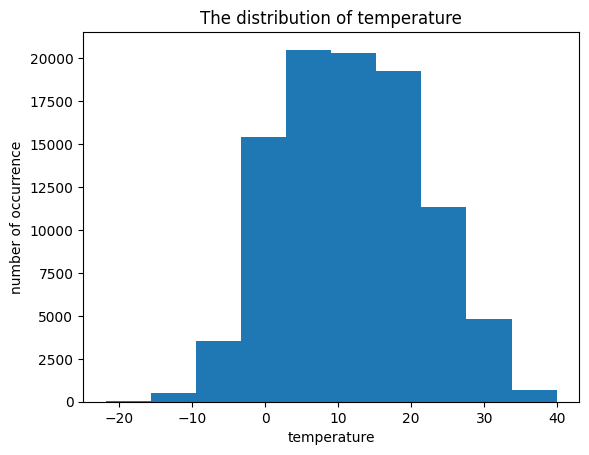

In [3]:
plt.hist(insurance_df.temperature)
plt.title("The distribution of temperature")
plt.xlabel("temperature")
plt.ylabel("number of occurrence")
plt.show()

In [4]:
# `Y` is the target variable
#Y = insurance_df['temperature']
Y = insurance_df['apparenttemperature'] - insurance_df['temperature']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = insurance_df[['humidity','windspeed']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.02918594 -0.11929075]

Intercept: 
 2.438105415187703


In [5]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:17:49   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

1. Weather model
For this assessment, you'll revisit the historical temperature dataset. To complete this assessment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.
As in the previous lesson, build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?

R squared and Adjusted R squared value is 0.288 which is not satisfactory it is less than 1 and also less than .5

R-squared is probably the most common measure of goodness of fit in a linear regression model. It is a proportion (between 0 and 1) that expresses how much variance in the outcome variable is explained by the explanatory variables in the model. Generally speaking, higher  𝑅2
  values are better to a point. A low  𝑅2
  indicates that your model isn't explaining much information about the outcome, which means that it will not give very good predictions.

  In the regression summary table above, you can see that your medical costs model's R-squared value is 0.288. This means that your model explains 28.8% of the variance in the charges, leaving 71.2% unexplained. You can conclude that there's still room for improvement.

**Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?**

In [6]:
############## Including humidity and windspeed ##############
# `Y` is the target variable
Y1 = insurance_df['apparenttemperature'] - insurance_df['temperature']

# This is the interaction between BMI and smoking
insurance_df["humi_wind_speed"] = insurance_df.humidity * insurance_df.windspeed

# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X1 = insurance_df[['humidity','windspeed', 'humi_wind_speed']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X1, Y1)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.17751219  0.09048213 -0.29711946]

Intercept: 
 0.08393631009782809


In [7]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X1 = sm.add_constant(X1)

results = sm.OLS(Y1, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:19:42   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0839      0.033      2.511      0.012       0.018       0.149
humidity            0.1775      0.043      4.133      0.000       0.093       0.262
windspeed           0.0905      0.002     36.797      0.000       0.086       0.095
humi_wind_speed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared value improved from 0.288 to 0.341. But still it is not satisfactory and there is room for improvement.

**Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?**

In [8]:
# `Y` is the target variable
#Y = insurance_df['temperature']
Y = insurance_df['apparenttemperature'] - insurance_df['temperature']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = insurance_df[['humidity','windspeed','visibility']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-2.60664109 -0.11990113  0.05398318]

Intercept: 
 1.575594686002333


In [9]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:23:52   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5756      0.028     56.605      0.000       1.521       1.630
humidity      -2.6066      0.025   -102.784      0.000      -2.656      -2.557
windspeed     -0.1199      0.001   -179.014      0.000      -0.121      -0.119
visibility     0.0540      0.001     46.614      0.000       0.052       0.056
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared value improved from 0.288 to 0.304 after adding visibility. But still it is not satisfactory and there is room for improvement.

Model 1:
No. Observations:	96453	AIC:	3.409e+05
Df Residuals:	96450	BIC:	3.409e+05

Model 2:
No. Observations:	96453	AIC:	3.334e+05
Df Residuals:	96449	BIC:	3.334e+05

Model 3:
No. Observations:	96453	AIC:	3.388e+05
Df Residuals:	96449	BIC:	3.388e+05

For both AIC and BIC, lower values indicate better models. So you should choose the model with the lowest AIC or BIC value.

So i pick model 2 as the best, as it has low AIC and BIC values out of the three.

**second problem - 2**

**In this exercise, you'll work on your house prices model. To complete this assessment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and assess the goodness of fit of your model using an F-test, R-squared, adjusted R-squared, AIC, and BIC.
Do you think that your model is satisfactory? If so, why?
In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.
For each model that you try, get the goodness-of-fit metrics and compare your models with each other. Which model is the best and why? ** **bold text**

In [10]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [11]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

house_prices_df = pd.DataFrame(engine.connect().execute(text('select * from houseprices')))

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary,humi_wind_speed
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,12.567
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.,12.268
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.,3.496
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.,11.706
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.,9.167
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.,11.865
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.,11.747
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.,12.595
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.,9.281
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.,9.019


In [12]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [13]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:36:34   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared:	0.769 and	Adj. R-squared:	0.767 with which i can say the model is somewhat satisfactory. However still there is room for improvement

In [14]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:41:08   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      0.000   -1.18e+05   -9.93e+04
overallqual  2.332e+04   1078.278     21.628      0.000    2.12e+04    2.54e+04
grlivarea      45.9659      2.452     18.743      0.000      41.155      50.777
garagecars   1.721e+04   1732.720      9.931      0.000    1.38e+04    2.06e+04
totalbsmtsf    29.3276      2.858     10.261      0.000      23.721      34.934
mszoning_FV  1.679e+04   5560.901      3.020      0.003    5885.005    2.77e+04
mszoning_RL  1.968e+04   2833.445      6.946      0.000    1.41e+04    2.52e+04
==============================================================================
Omnibus:                      406.420   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37605.498
Skew:                          -0.057   Prob(JB):                         0.00
Kurtosis:                      27.863   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I tried different model specifications by removing  statistically insignificant variables from the model and re-estimated it. Though the R squared, adjusted R squared, AIC,  BIC remain same in both, I used Fstatistic to compare two models. By which, I found the F statistic value as 803.3 in the second model compared to 482 in the first model. so i decide the second model is the best.

Select the best answer for the following questions:

Starting with the house price model given in the model table, how do the model degrees of freedom (Df model) change if you remove the features that are not statistically significant at a p = 0.05 level?

OLS House Price Table

Feature Name	Coefficient	Std err	T	P>|t|	[0.025	0.975]
const	-1.17E+05	1.80E+04	-6.502	0	-1.53E+05	-8.19E+04
overallqual	2.33E+04	1088.506	21.43	0	2.12E+04	2.55E+04
grlivarea	45.6344	2.468	18.494	0	40.794	50.475
garagecars	1.35E+04	2990.453	4.498	0	7584.056	1.93E+04
garagearea	16.4082	10.402	1.577	0.115	-3.997	36.813
totalbsmtsf	28.3816	2.931	9.684	0	22.633	34.131
mszoning_FV	2.51E+04	1.37E+04	1.833	0.067	-1761.679	5.19E+04
mszoning_RH	1.34E+04	1.58E+04	0.847	0.397	-1.77E+04	4.45E+04
mszoning_RL	2.86E+04	1.27E+04	2.246	0.025	3612.782	5.35E+04
mszoning_RM	9047.7894	1.29E+04	0.702	0.483	-1.62E+04	3.43E+04
street_Pave	151.0376	1.63E+04	0.009	0.993	-3.18E+04	3.21E+04

In [17]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[[ 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RH', 'mszoning_RM', 'mszoning_RL', 'street_Pave']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:53:34   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[[ 'mszoning_RL']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     93.16
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.08e-21
Time:                        02:51:09   Log-Likelihood:                -18499.
No. Observations:                1460   AIC:                         3.700e+04
Df Residuals:                    1458   BIC:                         3.701e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.434e+05   4383.021     32.708      0.000    1.35e+05    1.52e+05
mszoning_RL  4.765e+04   4936.422      9.652      0.000     3.8e+04    5.73e+04
==============================================================================
Omnibus:                      633.992   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3801.224
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                       9.886   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reference solution - keep it for future"
https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/5.solution_evaluating_goodness_of_fit.ipynb